Getting the btsettl PHOENIX models for the MM stars

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import os
import glob
from scipy.interpolate import interp1d
from scipy.io.idl import readsav
from astropy.table import Table
from astropy.io import ascii
import astropy.units as u
from scipy.optimize import leastsq
import astropy.constants as const
from astropy.convolution import convolve, Box1DKernel
from astropy.modeling import models, fitting
import prepare_phoenix as pp

#matplotlib set up
%matplotlib inline
from matplotlib import rcParams
rcParams["figure.figsize"] = (14, 5)
rcParams["font.size"] = 20

In [17]:
params = Table.read('stellar_parameters.csv')

In [18]:
params

Target,RAJ2000,DEJ2000,Jmag,J_e,Hmag,H_e,Kmag,K_e,Rmag,R_e,spt,L_bol,L_bol_e,Mass,Mass_e,Radius,Radius_e,Teff,Teff_e,parallax,distance,P_rot_d
str10,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str4,float64,float64,float64,float64,float64,float64,int64,int64,float64,float64,float64
GJ 1132,153.716027,-47.156796,9.245,0.026,8.666,0.031,8.322,0.027,13.098,0.11,M3.5,1.67e+31,5e+29,0.194,0.005,0.215,0.009,3196,72,83.07,12.03804021,126.59
GJ 676A,262.546646,-51.637012,6.711,0.02,6.082,0.024,5.825,0.029,8.675,0.012,M0,3.404e+32,8.3e+30,0.631,0.017,0.62,0.03,4014,94,63.07,15.85539876,41.2
GJ 15A,4.594036,44.022842,5.252,0.264,4.476,0.2,4.018,0.02,7.9,0.012,M1,8.61e+31,7e+29,0.393,0.009,0.385,0.002,3601,12,280.74,3.562014676,-1.0
GJ 649,254.536873,25.74423,6.448,0.021,5.865,0.02,5.624,0.016,8.685,0.012,M1,1.674e+32,1.7e+30,0.524,0.012,0.531,0.012,3621,41,96.38,10.3755966,-1.0
GJ 163,62.315307,-53.373737,7.948,0.026,7.428,0.04,7.135,0.021,10.734,0.012,M3.5,8.28e+31,2.4e+30,0.405,0.01,0.409,0.017,3460,76,66.59,15.01726986,61.0
GJ 849,332.417906,-4.640765,6.51,0.024,5.899,0.044,5.594,0.017,9.279,0.012,M3.5,1.105e+32,1e+30,0.465,0.011,0.464,0.018,3492,70,113.25,8.830022075,39.2
GJ 674,262.166316,-46.89513,5.711,0.019,5.154,0.033,4.855,0.018,8.337,0.012,M2.5,6.03e+31,1.4e+30,0.353,0.008,0.361,0.012,3404,59,220.24,4.540501271,32.9
GJ 699,269.452044,4.694597,5.244,0.02,4.834,0.034,4.524,0.02,8.298,0.012,M4,1.3e+31,2e+29,0.161,0.004,0.187,0.001,3223,17,548.31,1.823785815,130.4
L 980-5,215.313034,-1.122204,8.948,0.03,8.391,0.031,8.093,0.026,13.02,0.15,M3.5,2.49e+31,8e+29,0.232,0.006,0.25,0.01,3278,74,74.66,13.39405304,92.23


In [19]:
G = const.G
M = const.M_sun.to(u.kg)
R = const.R_sun.to(u.m)
for m, r, t in zip(params['Mass'], params['Radius'], params['Teff']):
    g = G*(m*M)/(r*R)**2
    g =  g.to(u.cm/u.s**2)
    print(t,np.log10(g.value))
    #print(logg)

3196 5.060992437402149
4014 4.65331360755076
3601 4.861538718661559
3621 4.707209872123922
3460 4.822076034503119
3492 4.772484619083325
3404 4.87082792887964
3223 5.101210290261985
3278 5.007675594849958
3119 5.113824503742217
3248 5.083980902336978
2619 5.292907918630075


[[3100, 3200], [5.0, 5.5], [0.0, 0.0], [0.0, 0.0]]
[{'Teff': 3100, 'logg': 5.0, 'FeH': 0.0, 'aM': 0.0}, {'Teff': 3100, 'logg': 5.5, 'FeH': 0.0, 'aM': 0.0}, {'Teff': 3200, 'logg': 5.0, 'FeH': 0.0, 'aM': 0.0}, {'Teff': 3200, 'logg': 5.5, 'FeH': 0.0, 'aM': 0.0}]
lte031.0-5.0-0.0a+0.0.BT-Settl.spec.7
lte031.0-5.5-0.0a+0.0.BT-Settl.spec.7
lte032.0-5.0-0.0a+0.0.BT-Settl.spec.7
lte032.0-5.5-0.0a+0.0.BT-Settl.spec.7
[[3100, 5.0], [3100, 5.5], [3200, 5.0], [3200, 5.5]]
[3196, 5.060992437402149]
4


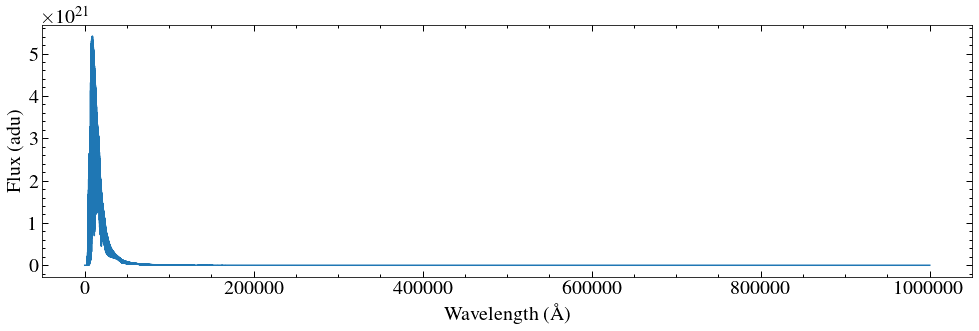

[[4000, 4100], [4.5, 5.0], [0.0, 0.0], [0.0, 0.0]]
[{'Teff': 4000, 'logg': 4.5, 'FeH': 0.0, 'aM': 0.0}, {'Teff': 4000, 'logg': 5.0, 'FeH': 0.0, 'aM': 0.0}, {'Teff': 4100, 'logg': 4.5, 'FeH': 0.0, 'aM': 0.0}, {'Teff': 4100, 'logg': 5.0, 'FeH': 0.0, 'aM': 0.0}]
lte040.0-4.5-0.0a+0.0.BT-Settl.spec.7
lte040.0-5.0-0.0a+0.0.BT-Settl.spec.7
lte041.0-4.5-0.0a+0.0.BT-Settl.spec.7
lte041.0-5.0-0.0a+0.0.BT-Settl.spec.7
[[4000, 4.5], [4000, 5.0], [4100, 4.5], [4100, 5.0]]
[4014, 4.65331360755076]
4


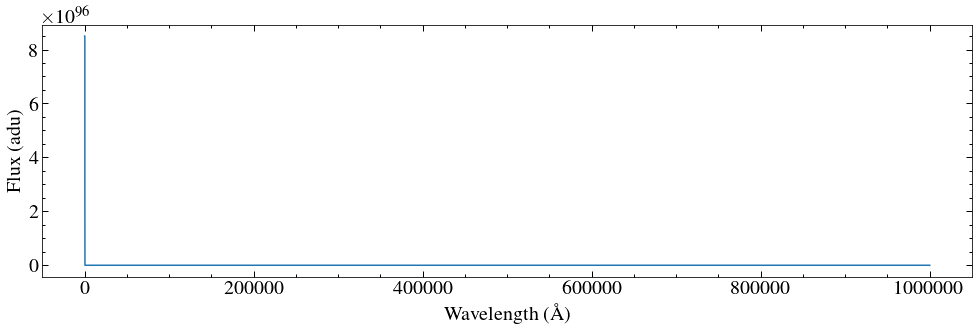

[[3600, 3700], [4.5, 5.0], [0.0, 0.0], [0.0, 0.0]]
[{'Teff': 3600, 'logg': 4.5, 'FeH': 0.0, 'aM': 0.0}, {'Teff': 3600, 'logg': 5.0, 'FeH': 0.0, 'aM': 0.0}, {'Teff': 3700, 'logg': 4.5, 'FeH': 0.0, 'aM': 0.0}, {'Teff': 3700, 'logg': 5.0, 'FeH': 0.0, 'aM': 0.0}]
lte036.0-4.5-0.0a+0.0.BT-Settl.spec.7
lte036.0-5.0-0.0a+0.0.BT-Settl.spec.7
lte037.0-4.5-0.0a+0.0.BT-Settl.spec.7
lte037.0-5.0-0.0a+0.0.BT-Settl.spec.7
[[3600, 4.5], [3600, 5.0], [3700, 4.5], [3700, 5.0]]
[3601, 4.861538718661559]
4


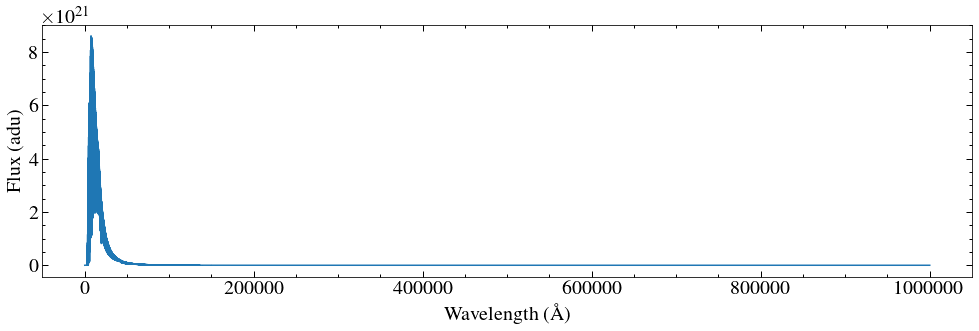

[[3600, 3700], [4.5, 5.0], [0.0, 0.0], [0.0, 0.0]]
[{'Teff': 3600, 'logg': 4.5, 'FeH': 0.0, 'aM': 0.0}, {'Teff': 3600, 'logg': 5.0, 'FeH': 0.0, 'aM': 0.0}, {'Teff': 3700, 'logg': 4.5, 'FeH': 0.0, 'aM': 0.0}, {'Teff': 3700, 'logg': 5.0, 'FeH': 0.0, 'aM': 0.0}]
lte036.0-4.5-0.0a+0.0.BT-Settl.spec.7
lte036.0-5.0-0.0a+0.0.BT-Settl.spec.7
lte037.0-4.5-0.0a+0.0.BT-Settl.spec.7
lte037.0-5.0-0.0a+0.0.BT-Settl.spec.7
[[3600, 4.5], [3600, 5.0], [3700, 4.5], [3700, 5.0]]
[3621, 4.707209872123922]
4


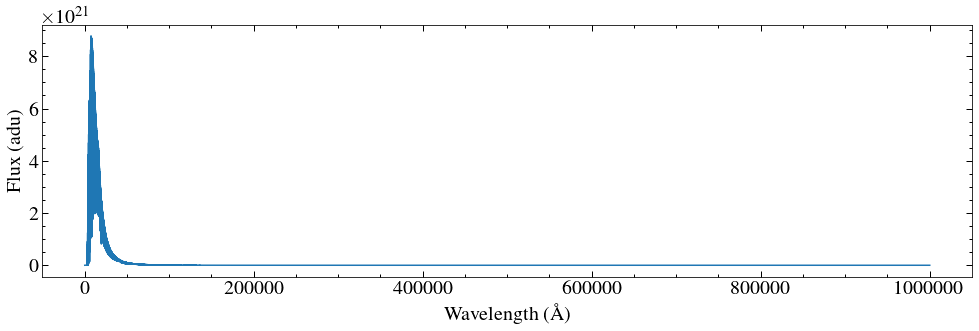

[[3400, 3500], [4.5, 5.0], [0.0, 0.0], [0.0, 0.0]]
[{'Teff': 3400, 'logg': 4.5, 'FeH': 0.0, 'aM': 0.0}, {'Teff': 3400, 'logg': 5.0, 'FeH': 0.0, 'aM': 0.0}, {'Teff': 3500, 'logg': 4.5, 'FeH': 0.0, 'aM': 0.0}, {'Teff': 3500, 'logg': 5.0, 'FeH': 0.0, 'aM': 0.0}]
lte034.0-4.5-0.0a+0.0.BT-Settl.spec.7
lte034.0-5.0-0.0a+0.0.BT-Settl.spec.7
lte035.0-4.5-0.0a+0.0.BT-Settl.spec.7
lte035.0-5.0-0.0a+0.0.BT-Settl.spec.7
[[3400, 4.5], [3400, 5.0], [3500, 4.5], [3500, 5.0]]
[3460, 4.822076034503119]
4


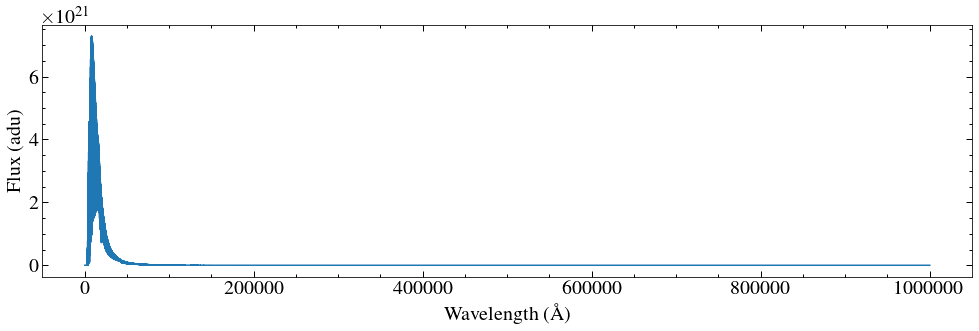

[[3400, 3500], [4.5, 5.0], [0.0, 0.0], [0.0, 0.0]]
[{'Teff': 3400, 'logg': 4.5, 'FeH': 0.0, 'aM': 0.0}, {'Teff': 3400, 'logg': 5.0, 'FeH': 0.0, 'aM': 0.0}, {'Teff': 3500, 'logg': 4.5, 'FeH': 0.0, 'aM': 0.0}, {'Teff': 3500, 'logg': 5.0, 'FeH': 0.0, 'aM': 0.0}]
lte034.0-4.5-0.0a+0.0.BT-Settl.spec.7
lte034.0-5.0-0.0a+0.0.BT-Settl.spec.7
lte035.0-4.5-0.0a+0.0.BT-Settl.spec.7
lte035.0-5.0-0.0a+0.0.BT-Settl.spec.7
[[3400, 4.5], [3400, 5.0], [3500, 4.5], [3500, 5.0]]
[3492, 4.772484619083325]
4


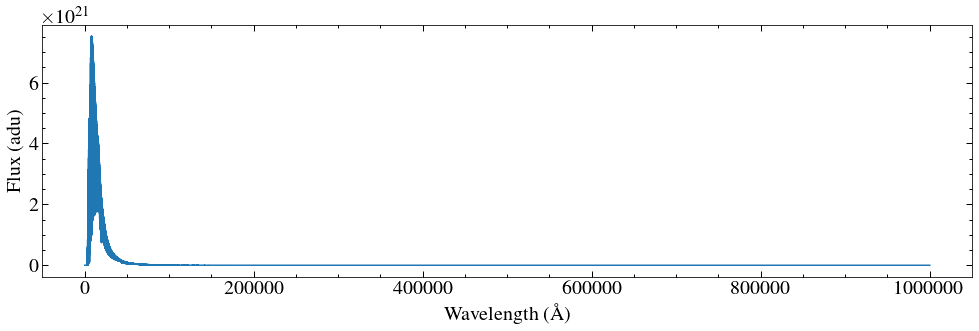

[[3400, 3500], [4.5, 5.0], [0.0, 0.0], [0.0, 0.0]]
[{'Teff': 3400, 'logg': 4.5, 'FeH': 0.0, 'aM': 0.0}, {'Teff': 3400, 'logg': 5.0, 'FeH': 0.0, 'aM': 0.0}, {'Teff': 3500, 'logg': 4.5, 'FeH': 0.0, 'aM': 0.0}, {'Teff': 3500, 'logg': 5.0, 'FeH': 0.0, 'aM': 0.0}]
lte034.0-4.5-0.0a+0.0.BT-Settl.spec.7
lte034.0-5.0-0.0a+0.0.BT-Settl.spec.7
lte035.0-4.5-0.0a+0.0.BT-Settl.spec.7
lte035.0-5.0-0.0a+0.0.BT-Settl.spec.7
[[3400, 4.5], [3400, 5.0], [3500, 4.5], [3500, 5.0]]
[3404, 4.87082792887964]
4


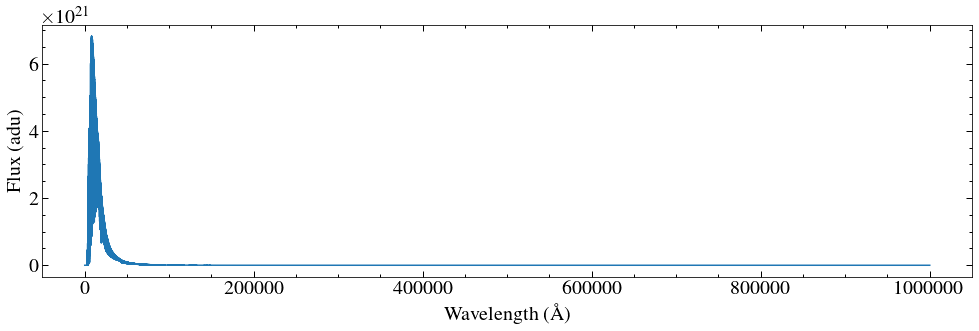

[[3200, 3300], [5.0, 5.5], [0.0, 0.0], [0.0, 0.0]]
[{'Teff': 3200, 'logg': 5.0, 'FeH': 0.0, 'aM': 0.0}, {'Teff': 3200, 'logg': 5.5, 'FeH': 0.0, 'aM': 0.0}, {'Teff': 3300, 'logg': 5.0, 'FeH': 0.0, 'aM': 0.0}, {'Teff': 3300, 'logg': 5.5, 'FeH': 0.0, 'aM': 0.0}]
lte032.0-5.0-0.0a+0.0.BT-Settl.spec.7
lte032.0-5.5-0.0a+0.0.BT-Settl.spec.7
lte033.0-5.0-0.0a+0.0.BT-Settl.spec.7
lte033.0-5.5-0.0a+0.0.BT-Settl.spec.7
[[3200, 5.0], [3200, 5.5], [3300, 5.0], [3300, 5.5]]
[3223, 5.101210290261985]
4


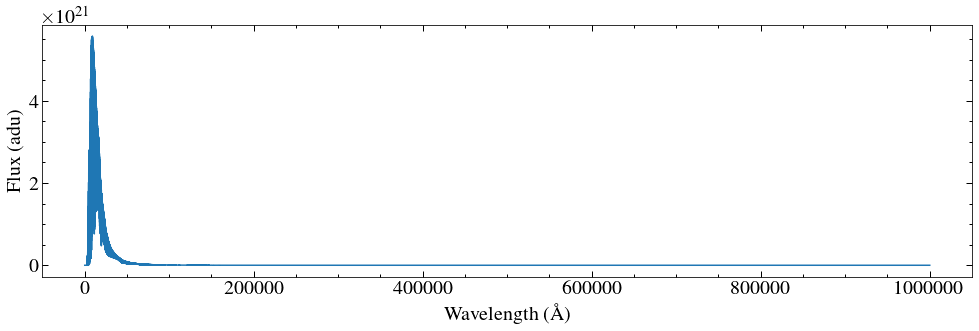

[[3200, 3300], [5.0, 5.5], [0.0, 0.0], [0.0, 0.0]]
[{'Teff': 3200, 'logg': 5.0, 'FeH': 0.0, 'aM': 0.0}, {'Teff': 3200, 'logg': 5.5, 'FeH': 0.0, 'aM': 0.0}, {'Teff': 3300, 'logg': 5.0, 'FeH': 0.0, 'aM': 0.0}, {'Teff': 3300, 'logg': 5.5, 'FeH': 0.0, 'aM': 0.0}]
lte032.0-5.0-0.0a+0.0.BT-Settl.spec.7
lte032.0-5.5-0.0a+0.0.BT-Settl.spec.7
lte033.0-5.0-0.0a+0.0.BT-Settl.spec.7
lte033.0-5.5-0.0a+0.0.BT-Settl.spec.7
[[3200, 5.0], [3200, 5.5], [3300, 5.0], [3300, 5.5]]
[3278, 5.007675594849958]
4


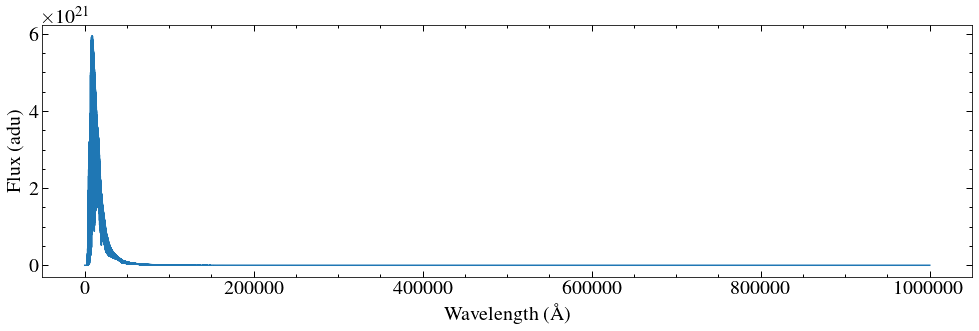

[[3100, 3200], [5.0, 5.5], [0.0, 0.0], [0.0, 0.0]]
[{'Teff': 3100, 'logg': 5.0, 'FeH': 0.0, 'aM': 0.0}, {'Teff': 3100, 'logg': 5.5, 'FeH': 0.0, 'aM': 0.0}, {'Teff': 3200, 'logg': 5.0, 'FeH': 0.0, 'aM': 0.0}, {'Teff': 3200, 'logg': 5.5, 'FeH': 0.0, 'aM': 0.0}]
lte031.0-5.0-0.0a+0.0.BT-Settl.spec.7
lte031.0-5.5-0.0a+0.0.BT-Settl.spec.7
lte032.0-5.0-0.0a+0.0.BT-Settl.spec.7
lte032.0-5.5-0.0a+0.0.BT-Settl.spec.7
[[3100, 5.0], [3100, 5.5], [3200, 5.0], [3200, 5.5]]
[3119, 5.113824503742217]
4


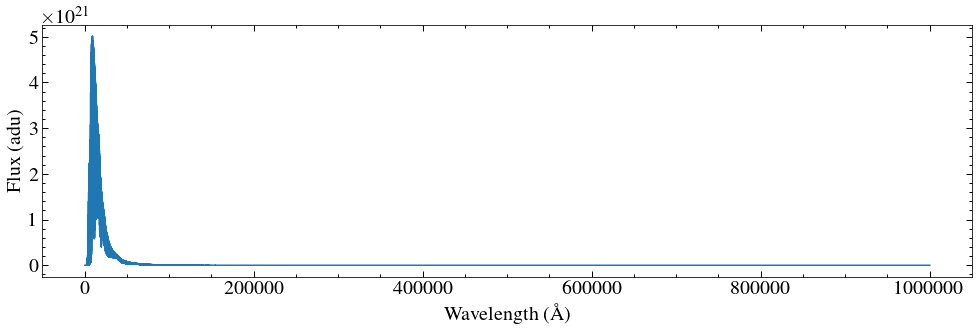

[[3200, 3300], [5.0, 5.5], [0.0, 0.0], [0.0, 0.0]]
[{'Teff': 3200, 'logg': 5.0, 'FeH': 0.0, 'aM': 0.0}, {'Teff': 3200, 'logg': 5.5, 'FeH': 0.0, 'aM': 0.0}, {'Teff': 3300, 'logg': 5.0, 'FeH': 0.0, 'aM': 0.0}, {'Teff': 3300, 'logg': 5.5, 'FeH': 0.0, 'aM': 0.0}]
lte032.0-5.0-0.0a+0.0.BT-Settl.spec.7
lte032.0-5.5-0.0a+0.0.BT-Settl.spec.7
lte033.0-5.0-0.0a+0.0.BT-Settl.spec.7
lte033.0-5.5-0.0a+0.0.BT-Settl.spec.7
[[3200, 5.0], [3200, 5.5], [3300, 5.0], [3300, 5.5]]
[3248, 5.083980902336978]
4


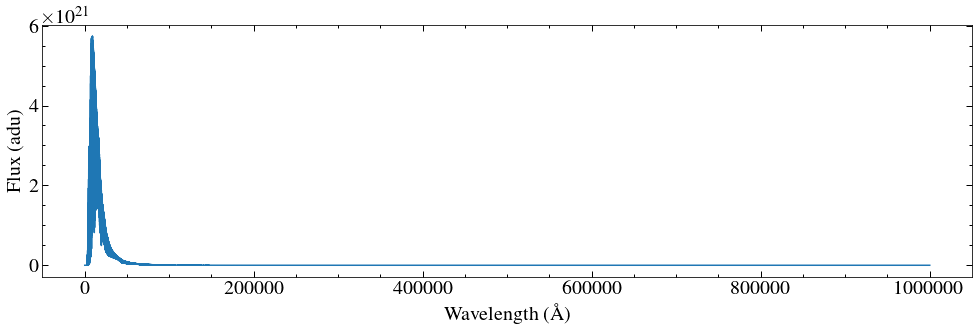

In [20]:
###### pp.make_phoenix_spectrum(star, save_path, repo, star_params, save_ecsv=False, plot=False)
#star_params = {'Teff': 2628, 'logg': 5.21, 'FeH': 0.00, 'aM': 0, 'radius':1.16*u.R_jup, 'distance':12.43*u.pc}
G = const.G
M = const.M_sun.to(u.kg)
R = const.R_sun.to(u.m)
save_path = 'interpolated_models/'
repo = '/media/david/5tb_storage1/muscles/btsettl_models/'
for row in params:
    star = row['Target']
    if star != 'Trappist-1':
        g = (G*(row['Mass']*M)/(row['Radius']*R)**2).to(u.cm/u.s**2)
        star_params = {'Teff': row['Teff'], 'logg': np.log10(g.value), 'FeH': 0.00, 'aM': 0, 'radius':row['Radius']*u.R_sun, 'distance':row['distance']*u.pc}
        
        pp.make_phoenix_spectrum(star, save_path, repo, star_params, save_ecsv=True, plot=True)

In [21]:
glob.glob('interpolated_models/*ecsv')

['interpolated_models/GJ_674_phoenix_interpolated.ecsv',
 'interpolated_models/GJ_699_phoenix_interpolated.ecsv',
 'interpolated_models/LHS_2686_phoenix_interpolated.ecsv',
 'interpolated_models/GJ_649_phoenix_interpolated.ecsv',
 'interpolated_models/GJ_15A_phoenix_interpolated.ecsv',
 'interpolated_models/GJ_676A_phoenix_interpolated.ecsv',
 'interpolated_models/GJ_849_phoenix_interpolated.ecsv',
 'interpolated_models/GJ_163_phoenix_interpolated.ecsv',
 'interpolated_models/GJ_729_phoenix_interpolated.ecsv',
 'interpolated_models/GJ_1132_phoenix_interpolated.ecsv',
 'interpolated_models/L_980-5_phoenix_interpolated.ecsv']

In [22]:
"""for row in params:
    star = row['Target']
    if star == 'GJ 676A':
        g = (G*(row['Mass']*M)/(row['Radius']*R)**2).to(u.cm/u.s**2)
        star_params = {'Teff': row['Teff'], 'logg': np.log10(g.value), 'FeH': 0.00, 'aM': 0, 'radius':row['Radius']*u.R_sun, 'distance':row['distance']*u.pc}
        
        pp.make_phoenix_spectrum(star, save_path, repo, star_params, save_ecsv=True, plot=True)"""

"for row in params:\n    star = row['Target']\n    if star == 'GJ 676A':\n        g = (G*(row['Mass']*M)/(row['Radius']*R)**2).to(u.cm/u.s**2)\n        star_params = {'Teff': row['Teff'], 'logg': np.log10(g.value), 'FeH': 0.00, 'aM': 0, 'radius':row['Radius']*u.R_sun, 'distance':row['distance']*u.pc}\n        \n        pp.make_phoenix_spectrum(star, save_path, repo, star_params, save_ecsv=True, plot=True)"

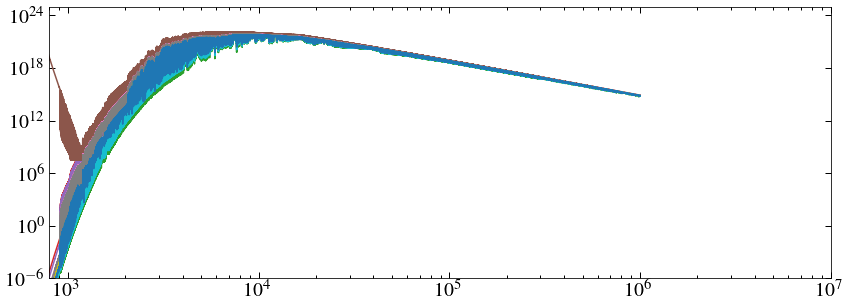

In [23]:
specs = glob.glob('interpolated_models/*ecsv')
for sp in specs:
    data = Table.read(sp)
    plt.plot(data['WAVELENGTH'], data['FLUX'])
    plt.xscale('log')
    plt.yscale('log')
    plt.xlim(800, 1e7)
    plt.ylim(1e-6, 1e25)

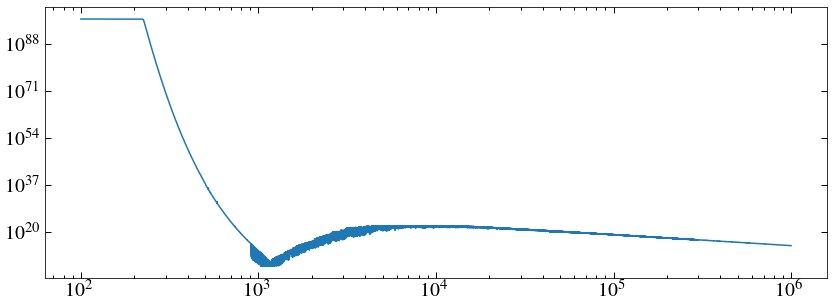

In [24]:
data = Table.read('interpolated_models/GJ_676A_phoenix_interpolated.ecsv')
plt.plot(data['WAVELENGTH'], data['FLUX'])
plt.xscale('log')
plt.yscale('log')